# Customer Segmentation and Analysis 
### Steps to solve the problem :
1. Understanding the Data
2. Perform Elbow method to find Optimal No. of clusters
3. Training a model using unsupervised learning algorith(K means)
4. Plotting the Clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df = pd.read_csv(r'../input/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Creating separate data frame

In [7]:
x = df.iloc[:,[3,4]].values

In [8]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Performing Elbow methods

In [9]:
from sklearn.cluster import KMeans
wcss = []


In [10]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

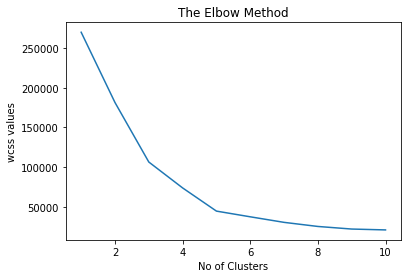

In [11]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss values')
plt.show()

# Training the module using K-Means

In [12]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++',random_state=0)

In [13]:
y_kmeans = kmeansmodel.fit_predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

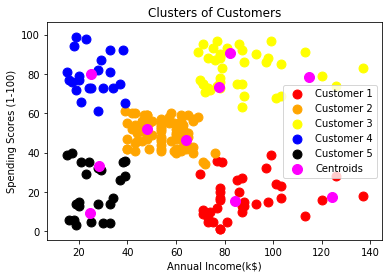

In [14]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c='red',label='Customer 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c='orange',label='Customer 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c='yellow',label='Customer 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c='blue',label='Customer 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c='black',label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='magenta', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Scores (1-100)')
plt.legend()
plt.show